## Przedstawienie wyników różnych algorytmów poleceń dla wybranego użytkownika

In [1]:
import pandas as pd
import clustering as cl
import knn as knn_alg

In [2]:
# Import datasetu
movies = pd.read_csv('data/movie.csv')
ratings = pd.read_csv('data/rating.csv')

In [3]:
# wybór użytkownika, dla którego będziemy polecać filmy, oraz ile filmów chcemy wyświetlić
user_id = 23
number_of_movies = 10

## Metoda klasteryzacji algorytmem k-średnich

In [4]:
# Tworzenie klastrów może zająć do około minuty
RS = cl.SystemRekomendacji(ratings, movies)
RS.prepare_clusters()

Termination criterion satisfied


True

In [5]:
recommended_movies = RS.recommend_movies(number_of_movies, user_id)
recommended_movies

,title
0,"Godfather, The (1972)"
1,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
2,Paths of Glory (1957)
3,Casablanca (1942)
4,"Third Man, The (1949)"
5,Rear Window (1954)
6,"Godfather: Part II, The (1974)"
7,12 Angry Men (1957)
8,City Lights (1931)
9,Wallace & Gromit: The Best of Aardman Animatio...


## KNN - k Nearest Neighbors

In [7]:
movie_recommender = knn_alg.MovieRecommender(movies, ratings)
movie_recommender.recommend_movies(user_id, number_of_movies, False)

Maximum rating for user 23 : 5.0
Movies with the maximum rating: [32, 47, 50, 223, 293, 296, 318, 508, 527, 535, 555, 608, 678, 778, 1047, 1059, 1060, 1089, 1095, 1111, 1188, 1249, 1358, 1500, 1527, 1580, 1584, 1617, 1653, 1704, 1754, 1805, 1833, 1835, 1909, 2006, 2028, 2058, 2294, 2324, 2952]

For movie Movie ID: 32, Title: Twelve Monkeys (a.k.a. 12 Monkeys) (1995), the 10 nearest neighbors are:
- Movie ID: 780, Title: Independence Day (a.k.a. ID4) (1996) with similarity 0.54
____________________________________________________________________
- Movie ID: 260, Title: Star Wars: Episode IV - A New Hope (1977) with similarity 0.53
____________________________________________________________________
- Movie ID: 480, Title: Jurassic Park (1993) with similarity 0.52
____________________________________________________________________
- Movie ID: 648, Title: Mission: Impossible (1996) with similarity 0.52
____________________________________________________________________
- Movie ID: 1210,

## Metoda 3

In [8]:
# kod

## Porównanie zwróconych wyników

In [9]:
# Łączymy ramki danych na podstawie tytułów filmów
merged_df = pd.merge(movies, recommended_movies, on='title', how='inner')

# Grupujemy po gatunkach i liczymy wystąpienia każdego gatunku
genres_counts = movies[movies['title'].isin(merged_df['title'])]['genres'].str.split('|', expand=True).stack().value_counts()

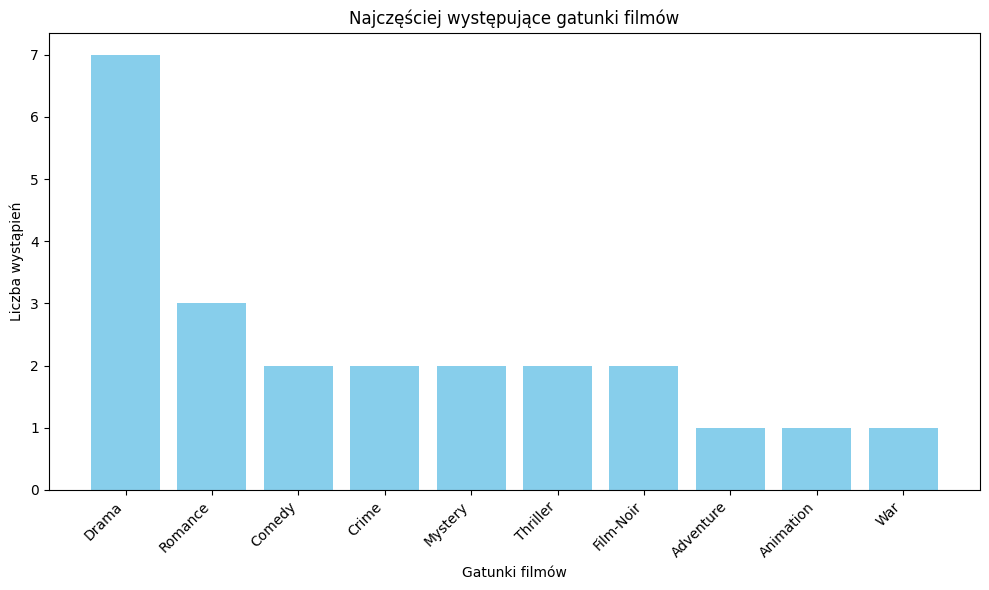

In [10]:
import matplotlib.pyplot as plt
# Tworzymy wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(genres_counts.keys(), genres_counts.values, color='skyblue')
plt.xlabel('Gatunki filmów')
plt.ylabel('Liczba wystąpień')
plt.title('Najczęściej występujące gatunki filmów')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()